# Decision Tree
- 사람이 사용하는 판단기법과 아주 유사
    - 직관적, 실생활에서 일반적으로 사람이 사용하는 방식과 상당히 유사

- 장점
    - 속도가 빠르고 간단
    - 데이터에 따라 상대적으로 다름
    - model에 비해 성능이 좋음

- 단점
    - 독립변수가 이산데이터인 경우에 적합
    - 역속적인 비정형 데이터의 경우 성능이 좋지 않음
    - class 수가 많을 경우에 사용이 힘듦
    - 데이터의 수가 적으면 좋지 않음

- Tree가 분기하는 기준
    - 순도가 높고 불순도가 낮은(불확실성이 낮은) 방향으로 분기
    - Information gain의 값이 크게 발생하는 방향으로 학습
    - 정보획득량은 어떤 사건이 얼마만큼의 정보를 줄 수 있는지를 수치화한 것
    - 불순도(Impurity)
    - 불확실성(Entropy): 무질서도를 정량화시킨 것
    - 일어날 확률이 높으면 정보량이 적음(항상 일어나는 일이니 얻을 수 있는 정보가 적음)
    - 불확실성이 크면 정보량이 많음
    


In [ ]:
import numpy as np

result_ori = -(10/16 * np.log2(10/16)) - (6/16 * np.log2(6/16))
print(result_ori)  # entropy 계산

0.954434002924965


In [ ]:
result1 = (8/16) * -((7/8) * np.log2(7/8) + (1/8) * np.log2(1/8))
result2 = (8/16) * -((5/8) * np.log2(5/8) + (3/8) * np.log2(3/8))

result_split = result1 + result2
print(result_split)

0.7489992230622807


In [ ]:
# 따라서 정보획득량은
print(result_ori - result_split)  # 0.20543477986268432

0.20543477986268432


In [ ]:
result = -((9/14) * np.log2(9/14) + (5/14) * np.log2(5/14))
print(result)  # 0.94

0.9402859586706311


In [ ]:
result_wind_weak = 8/14 * (-6/8 * np.log2(6/8) - 2/8 * np.log2(2/8))
result_wind_strong = 6/14 * (-3/6 * np.log2(3/6) - (3/6) * np.log2(3/6))
result_wind = result_wind_weak + result_wind_strong
print('Wind:', result_wind)  # 0.89

Wind:  0.8921589282623617


In [ ]:
# 전체 데이터를 Wind로 분류했을 때 우리가 얻을 수 있는 정보량
print('Information gain:', result - result_wind)  # 0.048

# 전체 데이터를 outlook으로 분류했을 때 우리가 얻을 수 있는 정보량
result_outlook_sunny = 5/14 * (- 2/5 * np.log2(2/5) - 3/5 * np.log2(3/5))
result_outlook_overcast = 0
result_outlook_rain = 5/14 * (- 3/5 * np.log2(3/5) - 2/5 * np.log2(2/5))

result_outlook = result_outlook_sunny + result_outlook_overcast + result_outlook_rain

print()
print('Outlook:', result_outlook)
print('Infomation Gain:', result - result_outlook)

# 전체 데이터를 humidity로 분류했을 때 우리가 얻을 수 있는 정보량
result_humidity_high = 7/14 * (- 3/7 * np.log2(3/7) - 4/7 * np.log2(4/7))
result_humidity_normal = 7/14 * (- 6/7 * np.log2(6/7) - 1/7 * np.log2(1/7))

result_humidity = result_humidity_high + result_humidity_normal

print()
print('Humidity:', result_humidity)
print('Information gain:', result - result_humidity)

Information gain: 0.04812703040826949

Outlook: 0.6935361388961918
Infomation Gain: 0.24674981977443933

Humidity: 0.7884504573082896
Information gain: 0.15183550136234159


- Outlook의 정보 획득량이 가장 크므로 Decision Tree의 처음 분기 기준으로 선택

# Iris
- Iris Data Set을 이용하여 Decision Tree 구현
- sklearn 이용
- column은 2개(꽃받침의 길이, 꽃잎의 길이) 사용

0.9333333333333333


<Axes: >

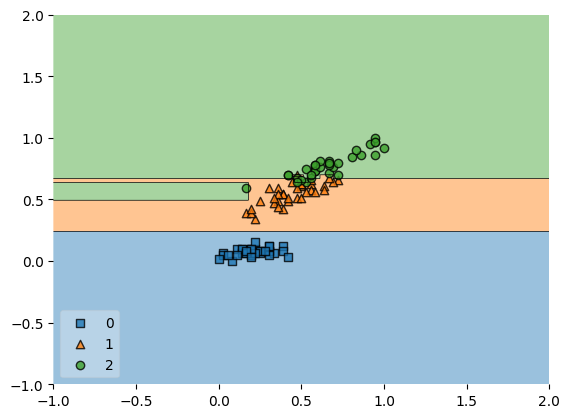

In [ ]:
# Module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

# Raw Data Loading
Iris = load_iris()
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = Iris.target

# 중복 데이터 제거
df_iris = df_iris.drop_duplicates()

# feature, target 추출
x_data = df_iris.drop(['target', 'sepal_width', 'petal_width'], axis=1).values
t_data = df_iris['target'].values

# normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

# Model
model = DecisionTreeClassifier()

# 학습
model.fit(x_data_train_norm, t_data_train)

# Evalation
print(accuracy_score(t_data_test, model.predict(x_data_test_norm)))

plot_decision_regions(x_data_train_norm,
                      t_data_train,
                      clf=model,
                      legend=3)

# MNIST
- 다중 분류 작업 수행
- Tensorflow, sklearn, SVM, Decision Tree로 구현 후 비교

### 1. data

In [ ]:
# Module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Raw Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/mnist/train.csv'
df_mnist = pd.read_csv(data)
display(df_mnist)

# feature, target 분할
x_data = df_mnist.drop('label', axis=1).values
t_data = df_mnist['label'].values.reshape(-1, 1)

x_data_train, x_data_test, t_data_train, t_data_test = train_test_split(x_data,
                                                                        t_data,
                                                                        stratify=t_data,
                                                                        test_size=0.3,
                                                                        random_state=42)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,...,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,191,255,255,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Tensorflow Keras

In [ ]:
# Model
model = Sequential()

# Layers
model.add(Flatten(input_shape=(784,)))
model.add(Dense(units=10,
                activation='softmax'))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# fit
model.fit(x_data_train,
          t_data_train,
          epochs=100,
          verbose=1,
          validation_split=0.2)

# Eval
pred = model.predict(x_data_test)
pred_class = np.argmax(pred, axis=1)
print(accuracy_score(t_data_test, pred_class))
# 0.8846825396825397

### 3. Scikit Learn

In [ ]:
# Model
sklearn_model = LogisticRegression()

# fit
sklearn_model.fit(x_data_train,
                  t_data_train)

# Eval
print(accuracy_score(t_data_test, sklearn_model.predict(x_data_test)))
# 0.909047619047619

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.909047619047619


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4. SVM

In [ ]:
# Model
svm_model = SVC()

# fit
svm_model.fit(x_data_train,
              t_data_train)

# Eval
print(accuracy_score(t_data_test, svm_model.predict(x_data_test)))
# 0.9718253968253968

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9718253968253968


### 5. Decision Tree

In [ ]:
# Model
dt_model = DecisionTreeClassifier()

# fit
dt_model.fit(x_data_train,
             t_data_train)

# Eval
print(accuracy_score(t_data_test, dt_model.predict(x_data_test)))
# 0.8552380952380952
# 속도가 빠르지만 클래스가 많아서 정확도 낮음

0.8552380952380952


# KNN (K-Nearest Neighbors)
- 가장 간단한 알고리즘
- 학습 과정이 없음(Lazy Model, Instance-based Learning)
- hyperparameter K
- 일반적으로 k=1인 경우 수학적으로 성능이 보장됨을 증명
- 거리 기반
- k의 값이 작으면 노이즈에 민감하며, 국부적인 패턴을 잡아낼 때 장점
- k의 값이 크면 전역적인 패턴에 더 잘 일반화 됨
- 너무 커지면 결정 경계를 부드럽게 만들지만 미세한 구조를 놓칠 수 있음


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_data_train,
              t_data_train)

print(accuracy_score(t_data_test, knn_model.predict(x_data_test)))
# 0.9631746031746031
# 속도도 빠르고 성능도 좋음

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9631746031746031
